# Titanic Machine Learning Exercise

## Import & Inspect Data

In [92]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# Import Raw Data
train_df = pd.read_csv(r'C:\Users\Qaahir Akram\Documents\Programming\Jupyter Notebook\Titanic Project\Titanic Exercise\train.csv')
test_df = pd.read_csv(r'C:\Users\Qaahir Akram\Documents\Programming\Jupyter Notebook\Titanic Project\Titanic Exercise\test.csv')

Examine Train Data

In [94]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [96]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Explore Features by Visualisation & Pivot Tables

### Survived

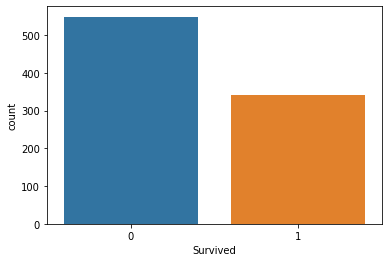

In [97]:
sns.countplot(x = 'Survived', data = train_df)
plt.show()

Overall probability of survival is 38.38%

### Pclass

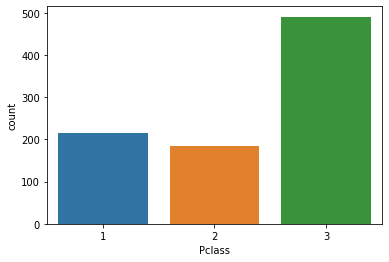

In [98]:
sns.countplot(x = 'Pclass', data = train_df)
plt.show()

In [99]:
train_df[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


There are more than twice as many third class passengers as there are first and second.

Much higher probability of survival for first class passengers.

### Sex

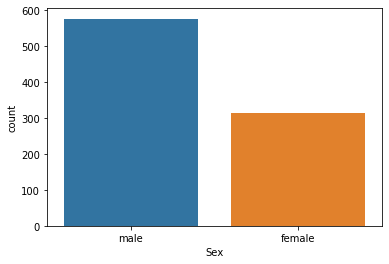

In [100]:
sns.countplot(x = 'Sex', data = train_df)
plt.show()

In [101]:
train_df[['Sex', 'Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Almost twice as many male passengers as there are female.

Significantly higher probability of survival for female passengers than for male.

### Age

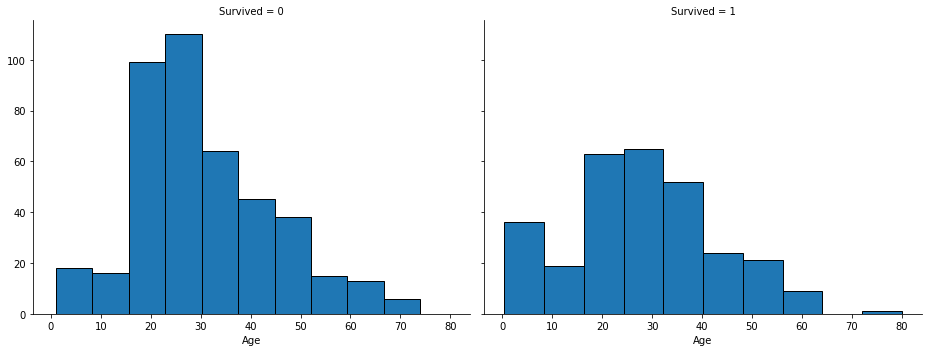

In [102]:
g = sns.FacetGrid(train_df, col = 'Survived', height = 5, aspect = 1.3)
g.map(plt.hist, 'Age', edgecolor = 'black')
plt.show()

Significantly more passengers within the 15-40 year old range. 

While it does seem that the probability of survival increases outside of this age bracket (i.e. children younger than 10 or adults older than 50), this increase does not appear to be significant. Further inspection into the importance of this feature is required. 

### SibSp

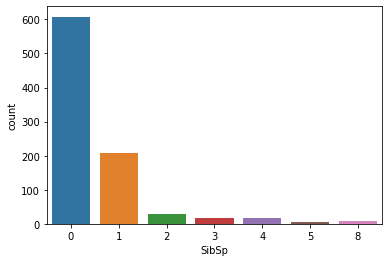

In [103]:
sns.countplot(train_df.SibSp)
plt.show()

In [104]:
train_df[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values('Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Majority of passengers are without a spouse or any siblings.

Highest chance of surival for those with 1 or 2 (possibly spousal couples or smaller groups of siblings), followed by passesngers with none. Survival rate decreases thereafter wiith increase in SibSp.

### Parch

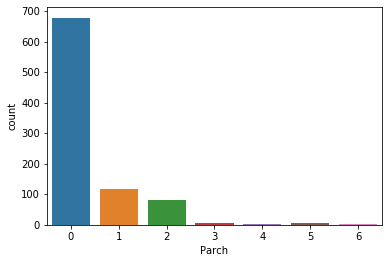

In [105]:
sns.countplot(train_df['Parch'])
plt.show()

In [106]:
train_df[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values('Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


As indicated for SibSp, majority of passengers are travelling alone.

Highest possibility of survival for 3, 1 & 2 (smaller families), then followed by solo travellers.

Possible correlation with SibSp. Combination of features should be considered.

### Fare

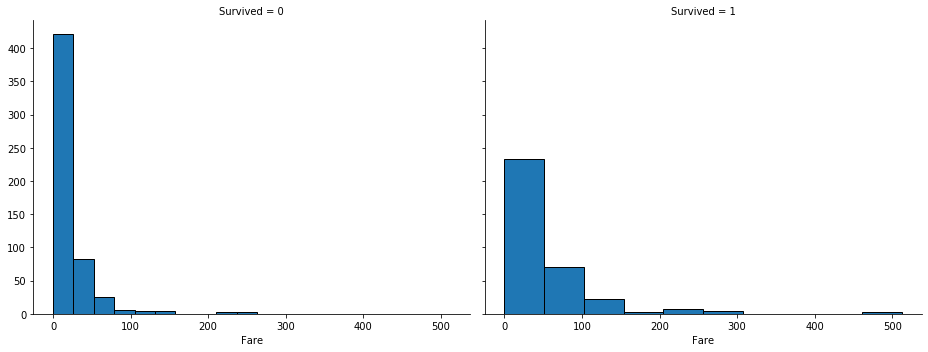

In [107]:
g = sns.FacetGrid(train_df, col = 'Survived', height = 5, aspect = 1.3)
g.map(plt.hist, 'Fare', edgecolor = 'black')
plt.show()

Cheaper tickets are more common on the ship. 

Higher chance of survival for the passengers who have paid a high fare.

Most likely correlated to Pclass. Consider dropping Fare (continuous variable) for the easier to handle categorical Pclass.

### Embarked

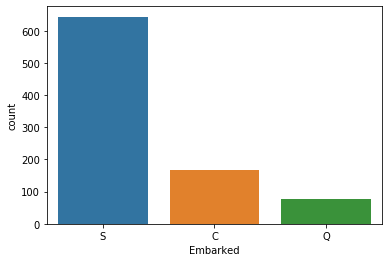

In [108]:
sns.countplot(train_df['Embarked'])
plt.show()

In [109]:
train_df[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Vast majority of passengers embarked from Southampton (starting point of the voyage).

Also a visible increase in the chance of survival for passengers embarking from Southampton, versus those from Cherbourg, which is marginally higher than those from Queenstown.

### Correlation between Features

The correlation matrix shown below serves to highlight to important points:
1. Which columns in our dataset show the strongest correlation to the survival of the passengers.These would be most the useful in our predictive model.
2. Which columns are closely related to each other. Related columns should either be combined or the less useful one dropped, in order to minimise overfitting.

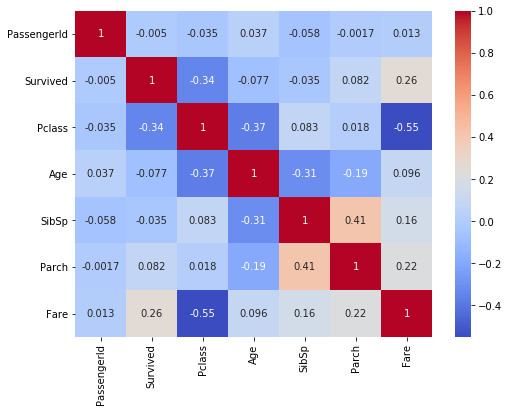

In [110]:
fig, ax = plt.subplots(figsize=(8, 6))
corrMatrix = train_df.corr()
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()

Noteworthy correlations:
- PassengerId has a negligible correlation to survival. Seeing that this is a unique number given to each passenger, it offers no benefit to our predictive model. This feature should therefore be dropped.

- Pclass shows the strongest correlation to survival than any other feature, and would therefore be the most beneficial to our predictive model. 
    Pclass is also very strongly correlated to Fare, as one would expect to pay more for the higher class tickets. Although Fare bears a strong correlation to survival, it's relation with Pclass will result in overfitting. To prevent this, Fare should be dropped. 
    
- Age bears a weak correlation to survival, but strong correlations to Pclass (which we have already deemed beneficial to our model) and the family features of Parch and SibSp. Its relationship with these variables make it a potential source of overfitting, with little benefit to the target itself. We should therefore consider dropping it from our model.

- SibSp and Parch share a strong correlation, and understandably so. Families onboard would contribute to both features. To avoid overfitting, a manner of combining these two features into a new column should be considered. 

## Missing Values

Check for missing values

In [111]:
print(train_df.shape)
missing_values = train_df.isnull().sum()
print('Missing Values: ')
print(missing_values[missing_values > 0])

(891, 12)
Missing Values: 
Age         177
Cabin       687
Embarked      2
dtype: int64


**Age**

177 missing values accounts for just under 20% of the total rows. Usually this would be a sufficiently small proportion to simply impute the missing values, but given the findings outlined in the correlation heatmap, this is just another reason to ignore the feature altogether. The Age column should therefore be omitted from the predictive model.

**Cabin**

687 missing values is a not insignificant 77% of the total rows. Imputing these by any method would therefore make no sense. This feature should also be omitted from our predictive model. 

**Embarked**

With only 2 values missing, this column contains valid information for 99.8% of the total rows. We will therefore simply be filling those two missing cells with the mode of the column, "S" for Southampton.

In [112]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

# Check to see if imputation was successful:
missing_values = train_df.isnull().sum()
print('Missing Values: ')
print(missing_values[missing_values > 0])

Missing Values: 
Age      177
Cabin    687
dtype: int64


## Feature Creation & Manipulation

**Sex**

For our predictive model to handle the Sex column, we would need to convert the values from strings (male & female) to numerical values (0 & 1). 

In [113]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1}).astype(int)

**Embarked**

For our predictive model to handle the Embarked column, we would need to convert the 'S', 'C' & 'Q' strings into a more handleable format. Furthermore, since these values are not ordinal, we cannot simply leave them as integers (0, 1 & 2 for example).

We need to create three binary columns, one for each embarkment location. Each column will simply contain a 1 if the passenger embarked from that particular location, and 0 if not. 

In [114]:
train_df['Southampton'] = np.where((train_df['Embarked'] == 'S'), 1, 0)
train_df['Cherbourg'] = np.where((train_df['Embarked'] == 'C'), 1, 0)
train_df['Queenstown'] = np.where((train_df['Embarked'] == 'Q'), 1, 0)

**Family Feature**

As discussed above, the Parch & SibSp columns both refer to the size of the family a particular passenger is travelling with, and are therefore strongly correlated. These columns should be combined in some way that allows us to capture their predictive input without the potential for overfitting. 

Looking at the pivot tables for SibSp & Parch, the probability of survival can be segregated into three categories; Small family (highest chance of survival), travelling alone (second highest chance of survival) and large family (lowest chance of survival).

With this in mind, we create new features as follows:

In [115]:
# FamilySize shows 1 for a large family and 0 for a small family
train_df['FamilySize'] = np.where((train_df['Parch'] > 3) | (train_df['SibSp'] > 2), 1, 0)

# Alone indicates whether or not a passenger is travelling by themselves
train_df['Alone'] = np.where((train_df['Parch'] == 0) & (train_df['SibSp'] == 0), 1, 0)


In [116]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Southampton,Cherbourg,Queenstown,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,0,0,0,1


## Test Data Preprocessing

Replicate all preprocessing steps on testing data.

In [117]:
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1}).astype(int)

test_df['Southampton'] = np.where((test_df['Embarked'] == 'S'), 1, 0)
test_df['Cherbourg'] = np.where((test_df['Embarked'] == 'C'), 1, 0)
test_df['Queenstown'] = np.where((test_df['Embarked'] == 'Q'), 1, 0)

test_df['FamilySize'] = np.where((test_df['Parch'] > 3) | (test_df['SibSp'] > 2), 1, 0)
test_df['Alone'] = np.where((test_df['Parch'] == 0) & (test_df['SibSp'] == 0), 1, 0)

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Southampton,Cherbourg,Queenstown,FamilySize,Alone
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,1,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,0,0


## Feature Selection

In [123]:
y = train_df.Survived
features = ['Pclass', 'Sex', 'Alone', 'FamilySize', 'Southampton', 'Cherbourg', 'Queenstown']
X = train_df[features]
test_X = test_df[features]

# Split Raw Data into test & validation subsets
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

## Random Forest Classifier

### Determine Optimum Forest Design

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV

model = RandomForestClassifier(n_estimators=200, random_state=2)

grid_param = {
 'n_estimators': [100, 200, 300],
 'criterion':['gini', 'entropy'],
 'min_samples_split': [2, 10, 20],
 'min_samples_leaf': [1, 5],
 'bootstrap': [True, False],
}
gd_sr = GridSearchCV(estimator=model,
 param_grid=grid_param,
 scoring='accuracy',
 cv=5,
 n_jobs=-1)
gd_sr.fit(train_X[features], train_y)
best_parameters = gd_sr.best_params_
print(best_parameters)
# Output:
# {'bootstrap': True, 'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}

{'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100}


C:\Users\Qaahir Akram\.conda\envs\Data Science\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Run Optimal Forest Model

In [143]:
RFmodel = RandomForestClassifier(n_estimators = 100, criterion = 'gini', min_samples_leaf = 1, min_samples_split = 20, random_state = 2)
RFmodel.fit(X, y)
RFpreds = RFmodel.predict(test_X)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': RFpreds})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
